In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "../Data science/Datasets/Customer/segmentation data.csv"
df = pd.read_csv(path)
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.shape

(2000, 8)

In [4]:
df2 = df.copy()
df2['Sex'] = df['Sex'].replace({0: 'Male', 1: 'Female'})
df2['Marital status'] = df['Marital status'].replace({0: 'Single', 1: 'Non-single'})
df2['Education'] = df['Education'].replace({0: 'Unemployed', 1: 'skilled employee / official', 2: 'university', 3: 'graduate school'})
df2['Occupation'] = df['Occupation'].replace({0: 'Unemployed/unskilled', 1: 'Skilled employee', 2: 'management/self-employed/officer'})
df2['Settlement size'] = df['Settlement size'].replace({0: 'Small city', 1: 'Mid-sized city', 2: 'Big city'})

df2.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Male,Single,67,university,124670,Skilled employee,Big city
1,100000002,Female,Non-single,22,skilled employee / official,150773,Skilled employee,Big city
2,100000003,Male,Single,49,skilled employee / official,89210,Unemployed/unskilled,Small city
3,100000004,Male,Single,45,skilled employee / official,171565,Skilled employee,Mid-sized city
4,100000005,Male,Single,53,skilled employee / official,149031,Skilled employee,Mid-sized city


In [5]:
columns = df2.columns.values.tolist()
columns_remove = columns
columns_remove.remove('ID')
columns_remove.remove('Age')
columns_remove.remove('Income')
for col in columns:
    counts = df2[col].value_counts()
    print(counts)
    print('\n')

Sex
Male      1086
Female     914
Name: count, dtype: int64


Marital status
Single        1007
Non-single     993
Name: count, dtype: int64


Education
skilled employee / official    1386
university                      291
Unemployed                      287
graduate school                  36
Name: count, dtype: int64


Occupation
Skilled employee                    1113
Unemployed/unskilled                 633
management/self-employed/officer     254
Name: count, dtype: int64


Settlement size
Small city        989
Mid-sized city    544
Big city          467
Name: count, dtype: int64




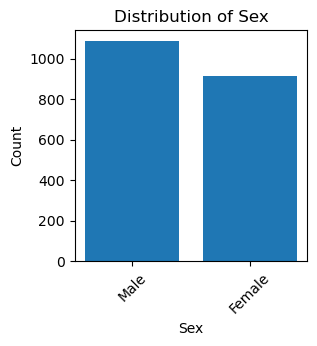

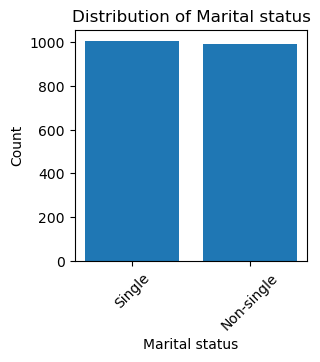

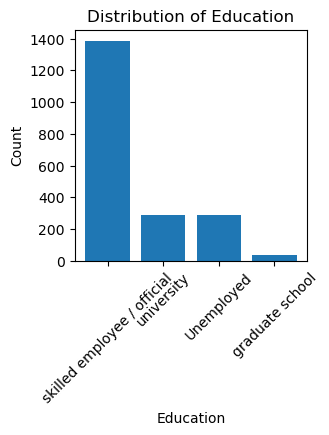

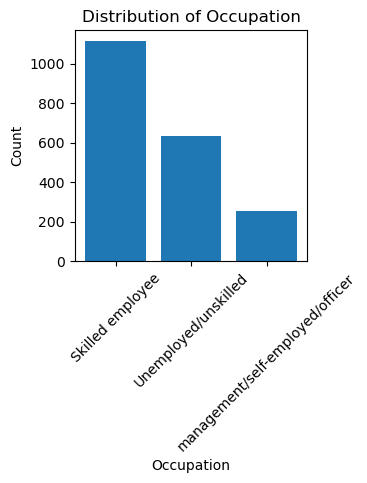

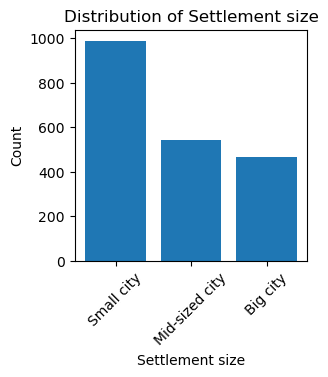

In [6]:
for col in columns_remove:
    counts = df2[col].value_counts()
    plt.figure(figsize=(3, 3))
    plt.bar(counts.index, counts.values)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 45)  # Rotar las etiquetas si es necesario
    plt.show()

In [7]:
print(f"The age varies between {min(df['Age'])} and {max(df['Age'])}")
print(f"The income varies between {min(df['Income'])} and {max(df['Income'])}")

The age varies between 18 and 76
The income varies between 35832 and 309364


In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
Z = linkage(df, method='ward')
Z

array([[5.28000000e+02, 5.33000000e+02, 7.34846923e+00, 2.00000000e+00],
       [1.44800000e+03, 1.45200000e+03, 1.29614814e+01, 2.00000000e+00],
       [9.03000000e+02, 9.08000000e+02, 1.52970585e+01, 2.00000000e+00],
       ...,
       [3.99100000e+03, 3.99300000e+03, 6.82376840e+05, 1.09700000e+03],
       [3.99400000e+03, 3.99500000e+03, 1.13247152e+06, 9.03000000e+02],
       [3.99600000e+03, 3.99700000e+03, 1.77543517e+06, 2.00000000e+03]])

In [10]:
#La primera columna indica un punto concreto del data set, el 520, el 1448...
#La segunda más de lo mismo. La tercera es a distancia y la cuarta el numero de puntos que hay en el cluster

In [11]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [12]:
c, coph_dist = cophenet(Z, pdist(df))
print(c)

0.5437203277913809


In [13]:
#let's try with other methodes:
list_c = []
meth = ['complete', 'average', 'single']
for lis in meth:
    Z = linkage(df, method=lis)
    c, coph_dist = cophenet(Z, pdist(df))
    print(f'for "{lis}" we have obtained a value of {c} of correlation')

for "complete" we have obtained a value of 0.7468736348432007 of correlation
for "average" we have obtained a value of 0.8177262969220246 of correlation
for "single" we have obtained a value of 0.6680402744605441 of correlation


In [14]:
#Average is the best method for creating this model
Z = linkage(df, method='average')
c, coph_dist = cophenet(Z, pdist(df))

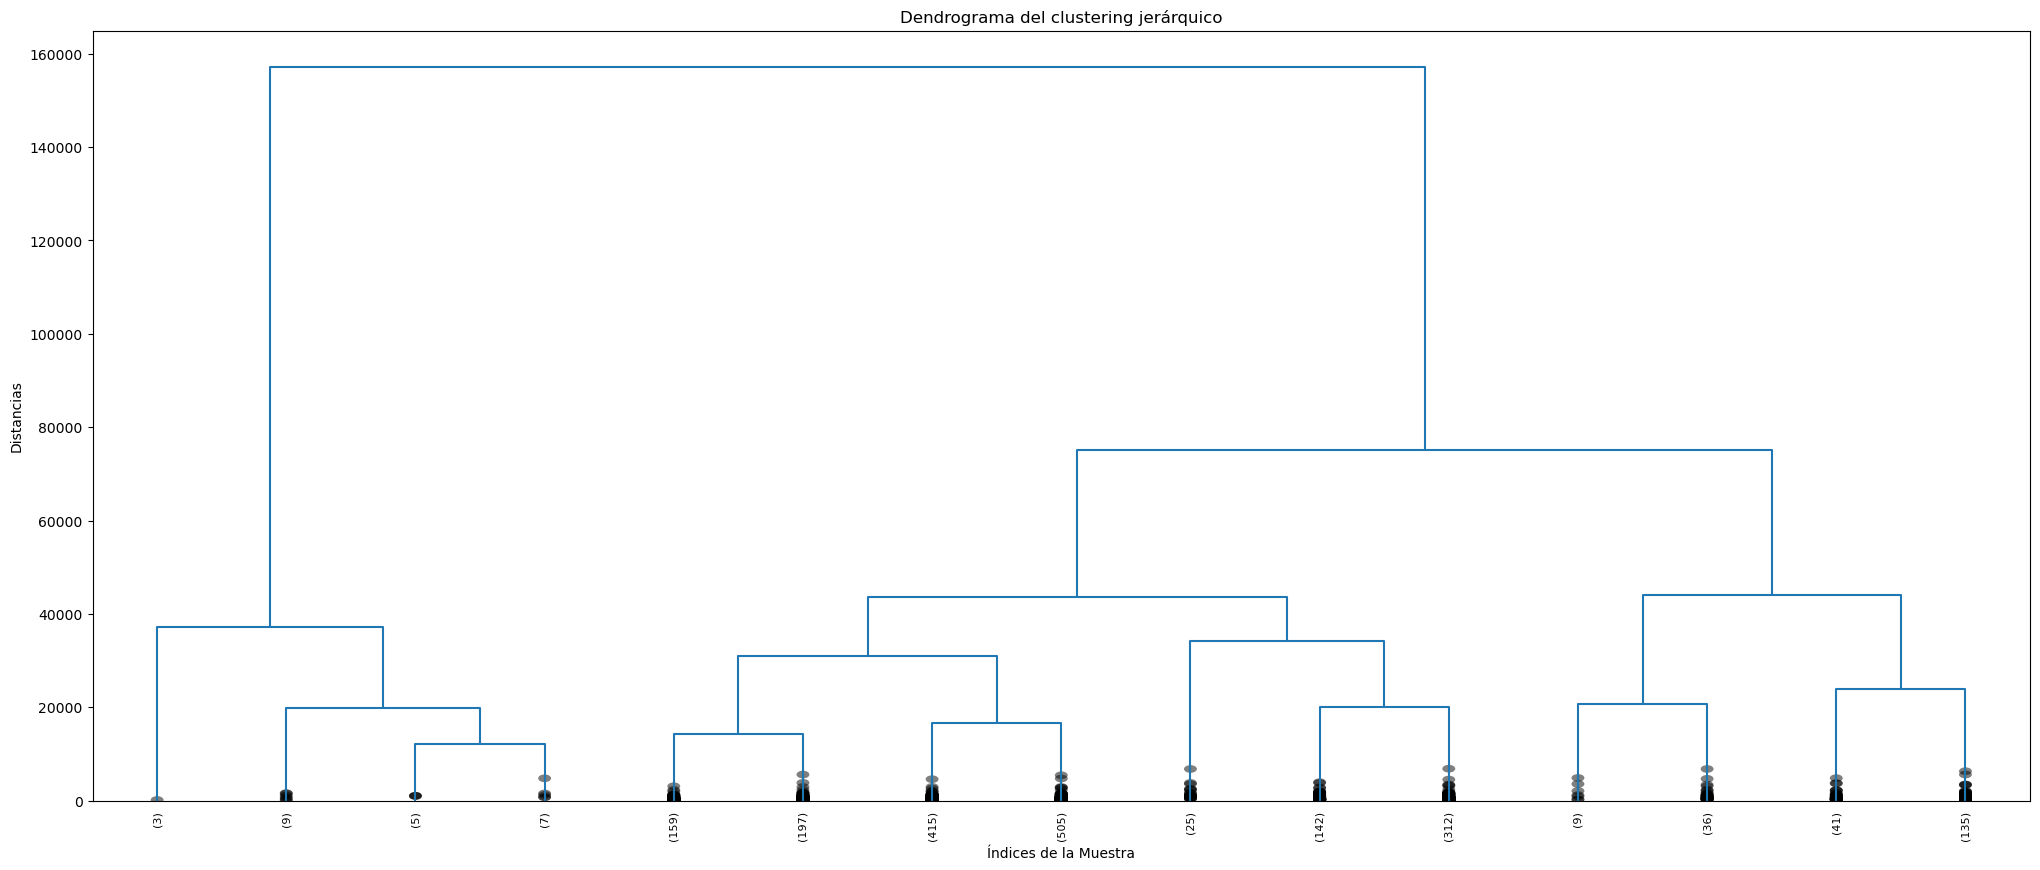

In [15]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180, truncate_mode="lastp", p = 15, show_contracted=True)
plt.show()

In [16]:
Z[-10:,]

array([[3.97500000e+03, 3.98300000e+03, 2.00559898e+04, 4.54000000e+02],
       [3.97700000e+03, 3.98200000e+03, 2.07991243e+04, 4.50000000e+01],
       [3.98100000e+03, 3.98400000e+03, 2.40073311e+04, 1.76000000e+02],
       [3.98600000e+03, 3.98700000e+03, 3.09859413e+04, 1.27600000e+03],
       [3.97900000e+03, 3.98900000e+03, 3.41867752e+04, 4.79000000e+02],
       [3.79000000e+03, 3.98800000e+03, 3.72743307e+04, 2.40000000e+01],
       [3.99200000e+03, 3.99300000e+03, 4.36390779e+04, 1.75500000e+03],
       [3.99000000e+03, 3.99100000e+03, 4.40693686e+04, 2.21000000e+02],
       [3.99500000e+03, 3.99600000e+03, 7.52127072e+04, 1.97600000e+03],
       [3.99400000e+03, 3.99700000e+03, 1.57114568e+05, 2.00000000e+03]])

In [17]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

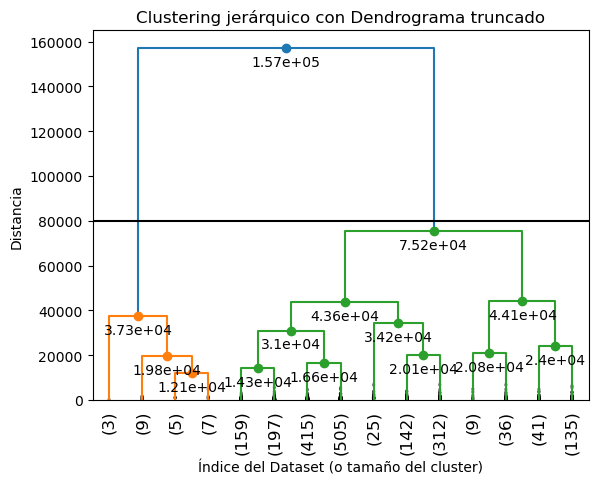

In [18]:
dendrogram_tune(Z,truncate_mode='lastp',p=15, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=8.00e+04)
plt.show()

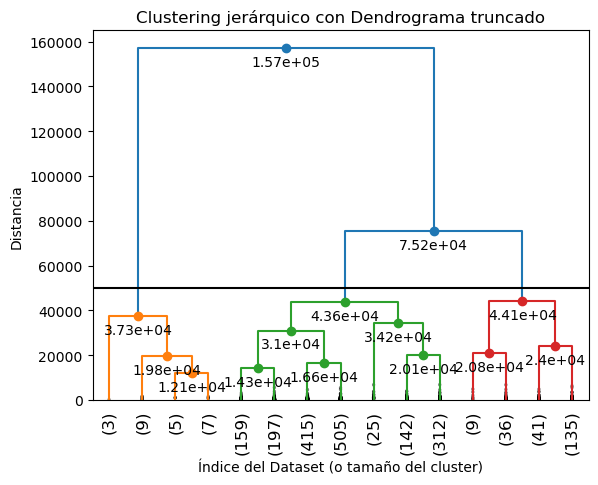

In [19]:
#but if we choose other max_d we get another cluster:
dendrogram_tune(Z,truncate_mode='lastp',p=15, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=5.00e+04)
plt.show()

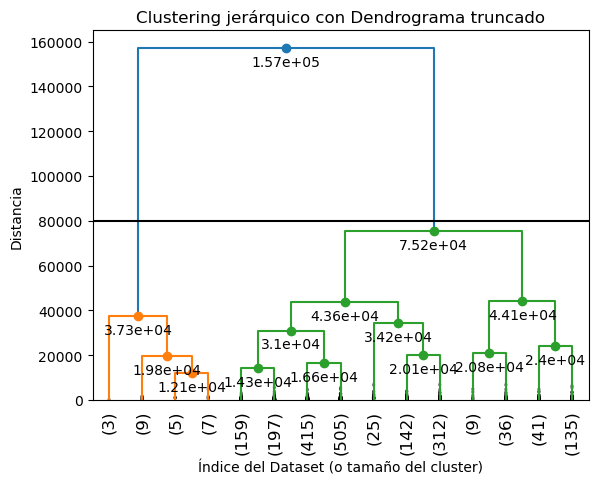

In [20]:
#or:
dendrogram_tune(Z,truncate_mode='lastp',p=15, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=8.00e+04)
plt.show()

In [21]:
from scipy.cluster.hierarchy import inconsistent
depth = 3 # las fusiones del arbol anteriores
incons = inconsistent(Z, depth)
incons[-20:]

array([[4.26698076e+03, 2.99500225e+03, 7.00000000e+00, 1.83349262e+00],
       [4.40426206e+03, 2.70835126e+03, 7.00000000e+00, 2.04746216e+00],
       [4.04083664e+03, 2.86140619e+03, 7.00000000e+00, 2.08824932e+00],
       [4.49909491e+03, 3.03744001e+03, 7.00000000e+00, 1.83656749e+00],
       [4.88985359e+03, 3.24109364e+03, 7.00000000e+00, 1.98415609e+00],
       [5.04588483e+03, 3.20432121e+03, 7.00000000e+00, 1.99831579e+00],
       [4.74026962e+03, 4.19362191e+03, 7.00000000e+00, 1.75470251e+00],
       [6.18661410e+03, 4.20379046e+03, 7.00000000e+00, 1.92702623e+00],
       [7.36616033e+03, 4.65772736e+03, 7.00000000e+00, 1.98411827e+00],
       [7.64451666e+03, 6.53107403e+03, 7.00000000e+00, 1.85776568e+00],
       [8.30810473e+03, 5.82491698e+03, 7.00000000e+00, 2.01683306e+00],
       [8.32537345e+03, 6.05755177e+03, 7.00000000e+00, 2.05920665e+00],
       [9.41391933e+03, 7.01586833e+03, 7.00000000e+00, 2.08005781e+00],
       [1.33478636e+04, 8.71012113e+03, 7.00000000e

Últimas 10 distancias revertidas: [157114.56783519  75212.70718725  44069.36857332  43639.07791831
  37274.33068982  34186.77522475  30985.94130599  24007.33105142
  20799.12432636  20055.9898462 ]


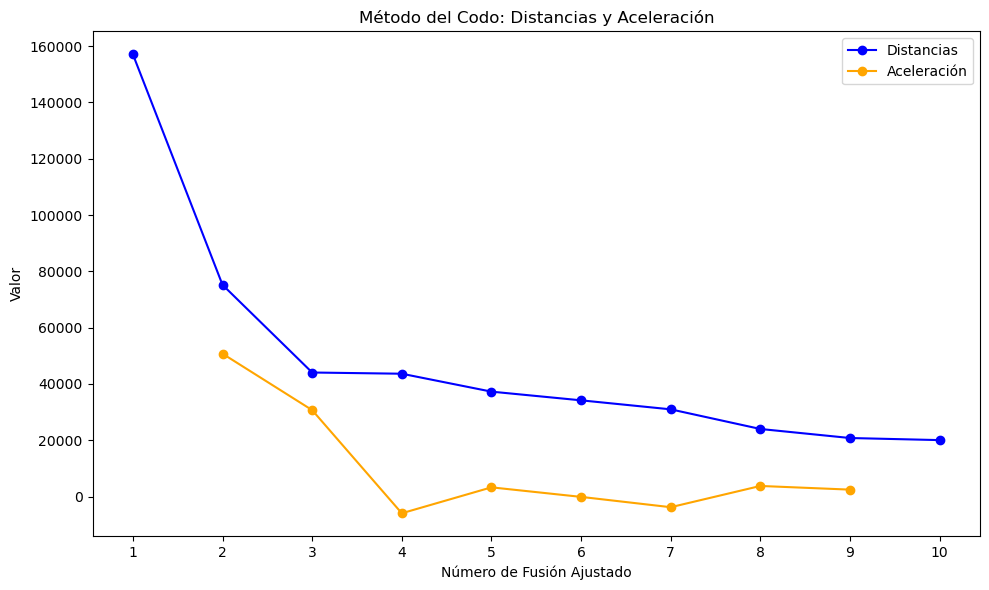

El número óptimo de clusters es 2 puesto que es el que tiene una aceleración más alta


In [22]:
# Elbow method:
last = Z[-10:, 2]  # Tomamos las últimas 10 distancias
last_rev = last[::-1]  # Revertimos el orden para enfocarnos en las últimas fusiones
print("Últimas 10 distancias revertidas:", last_rev)

# Crear un índice desde 1 hasta el número de elementos en 'last'
idx = np.arange(1, len(last) + 1)  

# Graficar todo en un solo gráfico
plt.figure(figsize=(10, 6))  # Configuramos el tamaño de la figura

# Graficar las distancias
plt.plot(idx, last_rev, marker='o', label='Distancias', color='blue')

# Calcular la segunda diferencia y revertirla
acc = np.diff(last, 2)  # Resta cada uno con el siguiente (diferencias de segundo orden)
acc_rev = acc[::-1]  # Revertimos el orden de la aceleración

# Graficar la aceleración en el mismo gráfico
plt.plot(idx[:-2] + 1, acc_rev, marker='o', label='Aceleración', color='orange')  # Ajustar el índice

# Etiquetas y leyendas
plt.title('Método del Codo: Distancias y Aceleración')
plt.xlabel('Número de Fusión Ajustado')
plt.ylabel('Valor')
plt.xticks(idx)  # Ajustar las marcas en el eje x
plt.legend()

plt.tight_layout()  # Ajustar automáticamente los márgenes
plt.show()  # Mostrar el gráfico

# Determinar el número óptimo de clusters
k = acc_rev.argmax() + 2  # Encontrar el índice máximo y ajustar
print("El número óptimo de clusters es %s puesto que es el que tiene una aceleración más alta" % str(k))

Dos o es el número óptimo de clusters según el método del codo, pero hay que tenr cuidado, porque según el contexto puede que dividir en más sea más conveniente, por ejemplo en este caso 3 o 5 clusteres podrían ser válidos también.

Recuperemos los diferentes clusteres con sus elementos:

In [30]:
from scipy.cluster.hierarchy import fcluster

In [33]:
max_d=8.00e+04
clusters = fcluster(Z, max_d, criterion="distance") #max_d indica la distancia máxima
np.set_printoptions(threshold=np.inf)
print(clusters)

"""
k=2
clusters = fcluster(Z, k, criterion="maxclust") #k indica el numero de clusters
clusters
np.set_printoptions(threshold=np.inf)
print(clusters)
"""

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

'\nk=2\nclusters = fcluster(Z, k, criterion="maxclust") #k indica el numero de clusters\nclusters\nnp.set_printoptions(threshold=np.inf)\nprint(clusters)\n'

Let's apply the KNN method:

In [ ]:
plt.hist(df)